# Monto Carlo Simulation of SP500

**Question: Start with 10k, invest 10k more annually, what is the probability that you will have at least 1mil after 30 years of investing inthe S&P 500 ETF**

In [98]:
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
import pandas as pd
#for currency formatting
import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [99]:
# trad savings calculator appraoach

pv = 10000
time_horizon = 30
i = 0.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(str(year) + ": " + locale.currency(ending, grouping=True))
    pv = ending


0: $20,700.00
1: $32,149.00
2: $44,399.43
3: $57,507.39
4: $71,532.91
5: $86,540.21
6: $102,598.03
7: $119,779.89
8: $138,164.48
9: $157,835.99
10: $178,884.51
11: $201,406.43
12: $225,504.88
13: $251,290.22
14: $278,880.54
15: $308,402.17
16: $339,990.33
17: $373,789.65
18: $409,954.92
19: $448,651.77
20: $490,057.39
21: $534,361.41
22: $581,766.71
23: $632,490.38
24: $686,764.70
25: $744,838.23
26: $806,976.91
27: $873,465.29
28: $944,607.86
29: $1,020,730.41


In [100]:
# Generate one possible future value based on market history
# We use 9% expected return with 18% volatility

pv = 10000
expected_return =  0.09
volatility = 0.18
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv

	Return     		Ending Value
	-0.0065               	$19,935.12
	0.1037               	$32,002.01
	0.2376               	$49,604.64
	0.1723               	$68,149.41
	0.2503               	$95,208.73
	0.2295               	$127,062.60
	-0.0762               	$127,374.56
	-0.2079               	$110,894.79
	0.0171               	$122,792.67
	0.4886               	$192,793.61
	-0.1421               	$175,406.44
	0.1384               	$209,682.55
	0.3821               	$299,792.80
	-0.0583               	$292,311.43
	-0.0636               	$283,716.94
	0.0191               	$299,134.48
	0.0633               	$328,078.76
	-0.0068               	$335,837.81
	0.0072               	$348,266.48
	0.003               	$359,305.69
	0.2017               	$441,770.58
	0.075               	$484,925.34
	0.2943               	$637,660.80
	0.0576               	$684,403.78
	-0.1098               	$619,271.78
	-0.0768               	$581,737.33
	0.0553               	$623,936.42
	-0.2881               	$4

In [110]:
iterations = 20000
all_streams = []

for x in range(iterations):
    expected_return = 0.09
    volatility = 0.18
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return, volatility)) + annual_investment, 2)
        stream.append(end)
        pv = end
    
    all_streams.append(stream)

# Concatenate all streams into a DataFrame
sim = pd.concat([pd.Series(stream) for stream in all_streams], axis=1)


In [111]:
# 5. Sample first five streams of annual ending values
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,24221.17,22735.03,19998.05,21006.12,21572.17
1,33596.22,41781.29,30634.88,37930.38,26669.89
2,37276.82,63920.25,45485.97,47109.18,43991.21
3,51687.05,83421.57,53860.64,64946.31,57477.97
4,53541.52,76529.81,68702.20,60076.34,63618.38
5,74802.59,106931.15,93728.44,71464.86,59980.65
6,87839.27,123507.92,107297.27,81719.64,82141.92
7,109960.42,124157.97,122540.72,85336.54,117358.17
8,138439.16,154132.67,154601.43,98248.33,141123.91
9,177270.83,197953.69,188642.71,113345.84,161869.18


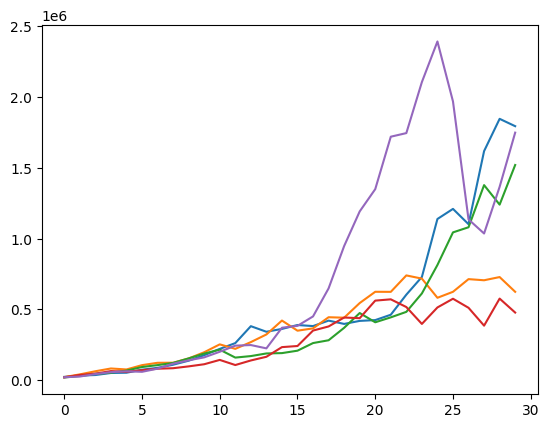

In [112]:
# 6. Plot first five simulated portfolios
plots.plot(sim[first_five])

In [113]:
# 7. Generate summary statistics with numpy functions

print("Count:", len(sim.loc[29]))
print("Mean: ", locale.currency(np.mean(sim.loc[29]),grouping=True))
print("SD: ",locale.currency(np.std(sim.loc[29]),grouping=True))
print("Max: ",locale.currency(np.max(sim.loc[29]), grouping=True))
print("Min: ", locale.currency(np.min(sim.loc[29]), grouping=True))

Count: 20000
Mean:  $1,511,968.96
SD:  $1,185,920.42
Max:  $18,912,724.77
Min:  $108,466.94


In [114]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = sim.loc[29]
ending_values.describe()

count    2.000000e+04
mean     1.511969e+06
std      1.185950e+06
min      1.084669e+05
25%      7.510573e+05
50%      1.182542e+06
75%      1.882059e+06
max      1.891272e+07
Name: 29, dtype: float64

(array([3.070e+02, 1.492e+03, 2.164e+03, 2.380e+03, 2.214e+03, 1.938e+03,
        1.625e+03, 1.390e+03, 1.074e+03, 8.880e+02, 7.520e+02, 5.820e+02,
        4.760e+02, 4.300e+02, 3.560e+02, 3.180e+02, 2.280e+02, 1.960e+02,
        1.630e+02, 1.420e+02, 1.380e+02, 1.080e+02, 7.300e+01, 6.700e+01,
        5.800e+01, 5.700e+01, 5.500e+01, 5.200e+01, 2.700e+01, 2.700e+01,
        2.200e+01, 2.300e+01, 2.300e+01, 1.700e+01, 1.300e+01, 1.400e+01,
        1.000e+01, 1.300e+01, 1.000e+01, 7.000e+00, 4.000e+00, 5.000e+00,
        7.000e+00, 7.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        5.000e+00, 7.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

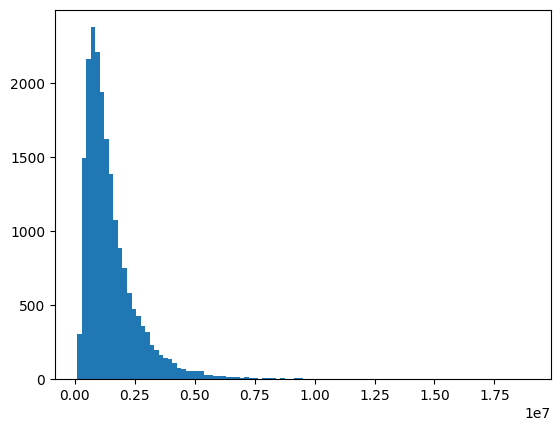

In [115]:
# 9. Get a visualization of the distribution of ending values

plots.hist(ending_values, bins=100)

In [116]:
# 10. Calculate probability of seeing a specific ending_value or less, 
# for example get close to the 75%ile, or $1,000,000

len(ending_values[ending_values<1000000]) / len(ending_values)

0.401

In [117]:
# 11. You can't really get a point estimate, but you can get a range ending values

len(ending_values[(ending_values> 800000) & (ending_values< 1100000)]) /len(ending_values)

0.17885

In [118]:
# 12. You can get a more comprehensive table of percentiles easily using numpy's percentile function

p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))

       5%-ile:  $400,641.08
      10%-ile:  $503,559.23
      15%-ile:  $592,217.98
      25%-ile:  $751,057.30
      75%-ile:  $1,882,059.44
      85%-ile:  $2,437,768.09
      90%-ile:  $2,889,724.32
      95%-ile:  $3,713,836.09
